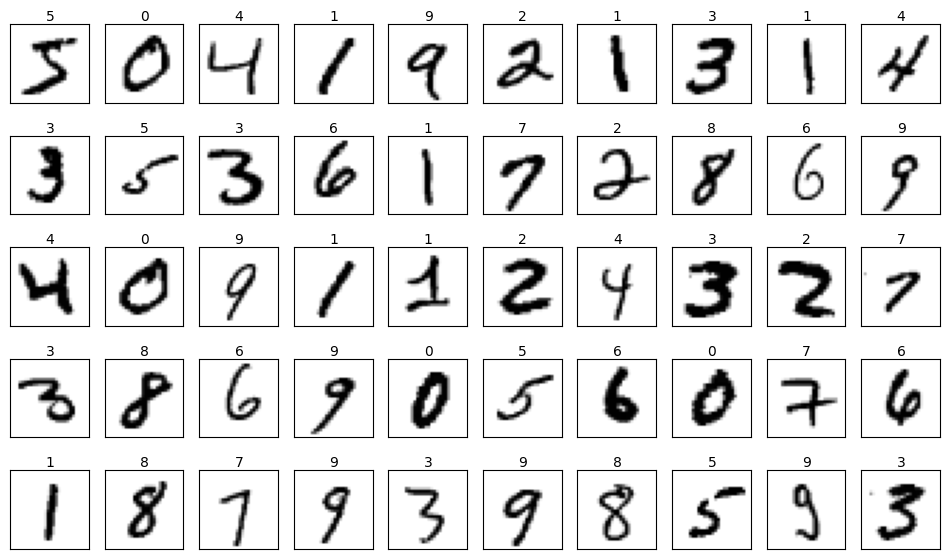

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Test accuracy: 0.9905999898910522


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
# 1. Visualize the first 50 images
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [],'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)
plt.show()
# 2. Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# 3. Define the CNN model
model = keras.models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                 layers.MaxPooling2D((2, 2)),layers.Conv2D(64, (3, 3), activation='relu'),
                                 layers.MaxPooling2D((2, 2)),layers.Flatten(),layers.Dense(10, activation='softmax')])
model.summary()
# 4. Train the model (without displaying epochs)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0) # Set verbose=0
# 5. Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) # Set verbose=0
print('Test accuracy:', accuracy)